In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv("/content/dataset.csv")

In [29]:
df.shape

(112634, 17)

In [30]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [31]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [32]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [33]:
df.duplicated().sum()

0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [35]:
df.nunique()

,0
VIN (1-10),7548
County,165
City,629
State,45
Postal Code,773
Model Year,20
Make,34
Model,114
Electric Vehicle Type,2
Clean Alternative Fuel Vehicle (CAFV) Eligibility,3


In [36]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [37]:
missing_percentage=df.isnull().mean()*100
missing_percentage

,0
VIN (1-10),0.000000
County,0.000000
City,0.000000
State,0.000000
Postal Code,0.000000
Model Year,0.000000
Make,0.000000
Model,0.017757
Electric Vehicle Type,0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0.000000


In [38]:
df['Model'].fillna(df['Model'].mode()[0], inplace=True)
df['Legislative District'].fillna(df['Legislative District'].mode()[0], inplace=True)
df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0], inplace=True)
df['Electric Utility'].fillna(df['Electric Utility'].mode()[0], inplace=True)

In [39]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [40]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.834029,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.692675,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [41]:
numerical_columns=df.select_dtypes(include=['int64','float64'])
numerical_columns

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,33040,2022,42,0,41.0,198968248,12087972100
1,89029,2013,38,0,41.0,5204412,32003005702
2,98901,2011,73,0,15.0,218972519,53077001602
3,98237,2017,238,0,39.0,186750406,53057951101
4,98201,2019,26,0,38.0,2006714,53061041500
...,...,...,...,...,...,...,...
112629,98019,2022,0,0,45.0,217955265,53033032401
112630,98250,2019,150,0,40.0,103663227,53055960301
112631,98070,2022,38,0,34.0,193878387,53033027702
112632,98042,2018,26,0,47.0,125039043,53033032007


In [42]:
def numerical_univariate_analysis(numerical_columns):
    for col_name in numerical_columns:
        print("*"*5,col_name,"*"*5)
        print(numerical_columns[col_name].agg(['min',"max","mean","median","std","skew","kurtosis"]))
        print()

In [ ]:
numerical_univariate_analysis(numerical_columns)

***** Postal Code *****
min          1730.000000
max         99701.000000
mean        98156.226850
median      98119.000000
std          2648.733064
skew          -27.955285
kurtosis      820.874840
Name: Postal Code, dtype: float64

***** Model Year *****
min         1997.000000
max         2023.000000
mean        2019.003365
median      2020.000000
std            2.892364
skew          -0.817579
kurtosis      -0.001160
Name: Model Year, dtype: float64

***** Electric Range *****
min           0.000000
max         337.000000
mean         87.812987
median       32.000000
std         102.334216
skew          0.817103
kurtosis     -0.876312
Name: Electric Range, dtype: float64

***** Base MSRP *****
min              0.000000
max         845000.000000
mean          1793.439681
median           0.000000
std          10783.753486
skew            10.100497
kurtosis       371.695682
Name: Base MSRP, dtype: float64

***** Legislative District *****
min          1.000000
max         49.000000
m

In [43]:
from scipy import stats

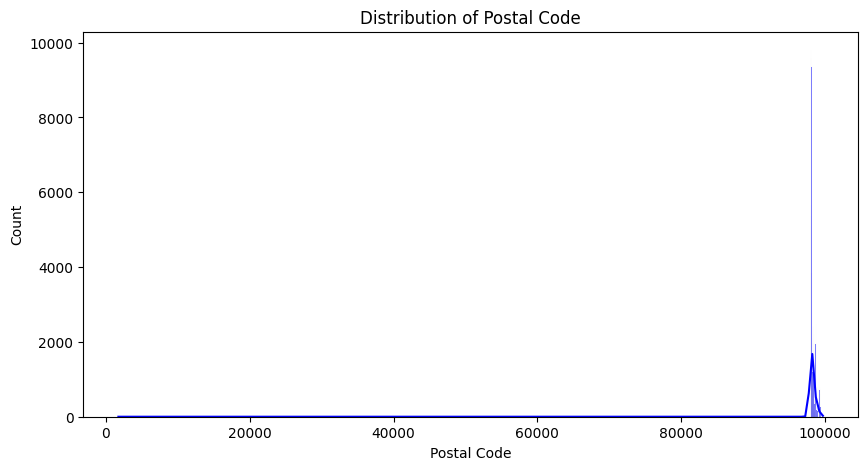

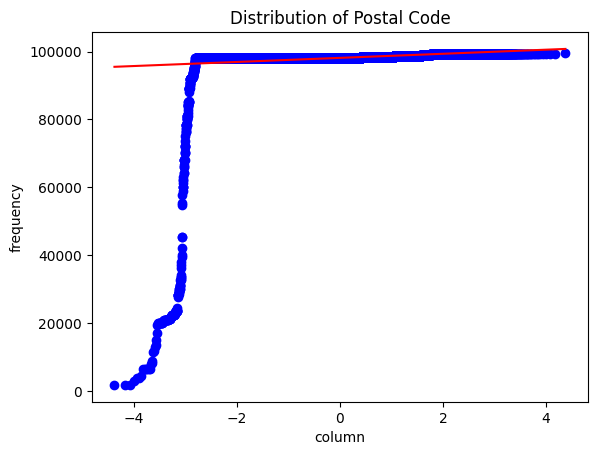

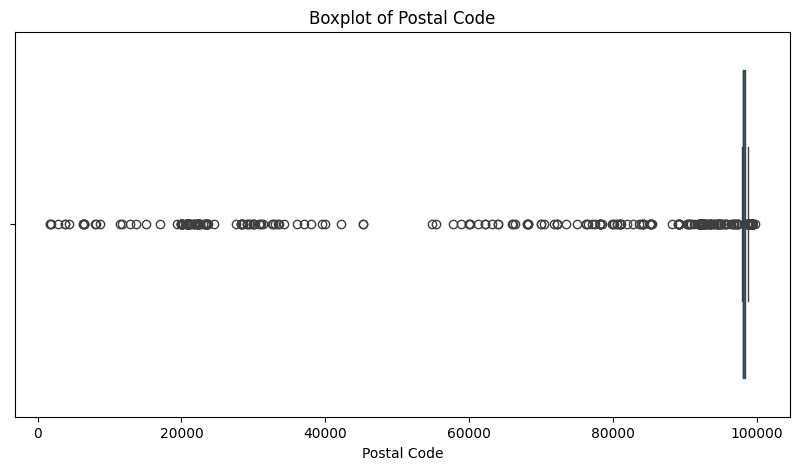

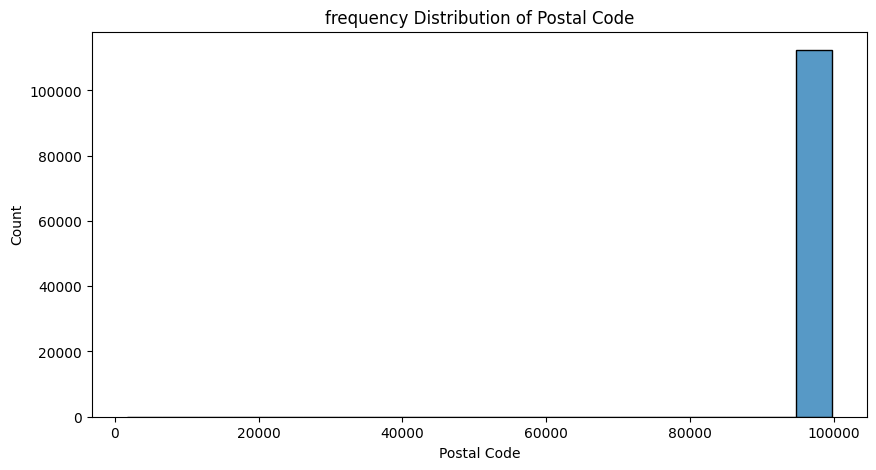

outliers in Postal Code"
"        VIN (1-10)     County               City State  Postal Code  \
0       JTMEB3FV6N     Monroe           Key West    FL        33040   
1       1G1RD6E45D      Clark           Laughlin    NV        89029   
2       JN1AZ0CP8B     Yakima             Yakima    WA        98901   
12      3C3CFFGE3G  St. Clair          Mascoutah    IL        62258   
19      5YJXCAE28G   Saratoga  Greenfield Center    NY        12833   
...            ...        ...                ...   ...          ...   
112490  5YJ3E1EB9M    Spokane            Spokane    WA        99212   
112514  1G1RC6E43F     Benton           Richland    WA        99354   
112541  JA4J24A50J   Williams          Williston    ND        58802   
112599  1C4JJXP66M    Spokane            Spokane    WA        99218   
112603  7FCTGAAL7N   Kootenai             Worley    ID        83876   

        Model Year        Make       Model  \
0             2022      TOYOTA  RAV4 PRIME   
1             2013   CHEVROLE

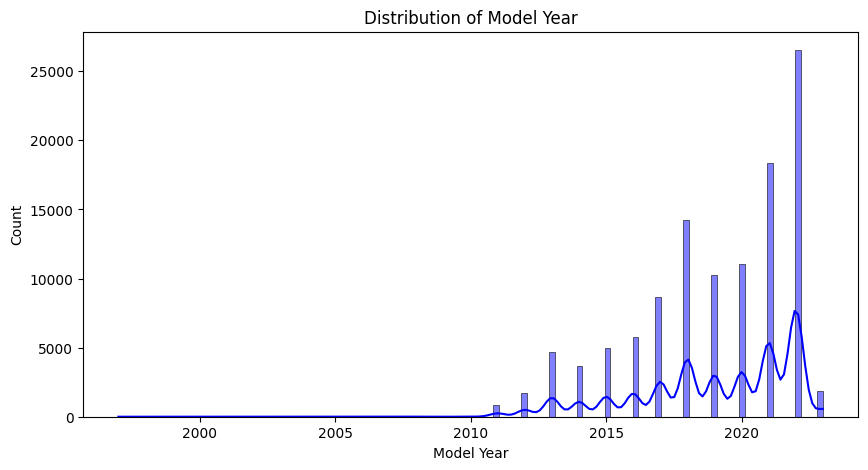

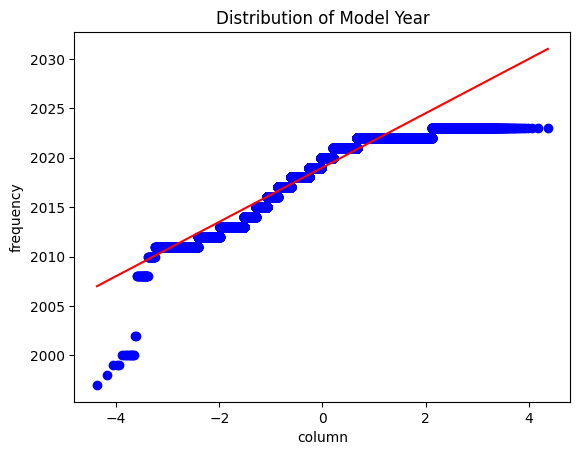

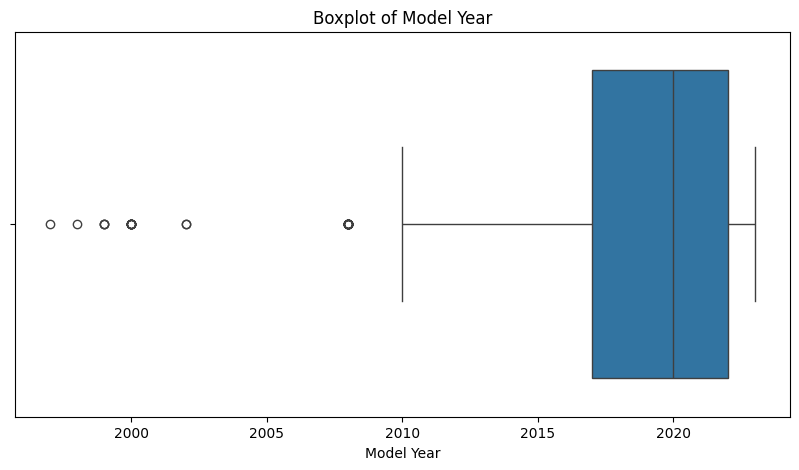

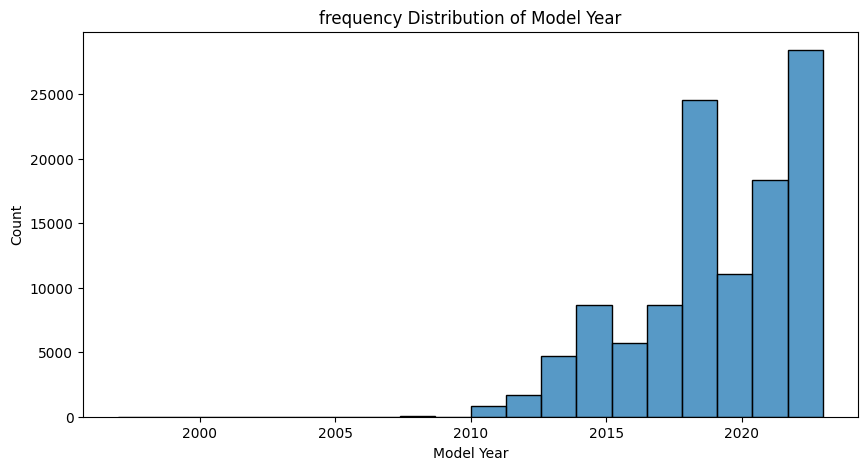

outliers in Model Year"
"        VIN (1-10)     County           City State  Postal Code  Model Year  \
14123   5YJRE11B88       King       Kirkland    WA        98033        2008   
14861   1FTZR0810Y       King        Seattle    WA        98136        2000   
23570   5YJRE11B98       King         Burien    WA        98166        2008   
23739   1FTZR0819Y       King      Shoreline    WA        98133        2000   
28584   1GCDE14HXV  Snohomish     Marysville    WA        98270        1997   
30410   5YJRE11B98       King       Issaquah    WA        98029        2008   
39799   1FTZR0812X     Skagit   Mount Vernon    WA        98274        1999   
39813   5YJRE11B08       King       Bellevue    WA        98004        2008   
43722   5YJRE11B78    Whatcom       Ferndale    WA        98248        2008   
48232   1FTZR081XY  Snohomish        Edmonds    WA        98026        2000   
49921   1FTZR0819X    Whatcom         Deming    WA        98244        1999   
51016   1FTZR0816Y       Ki

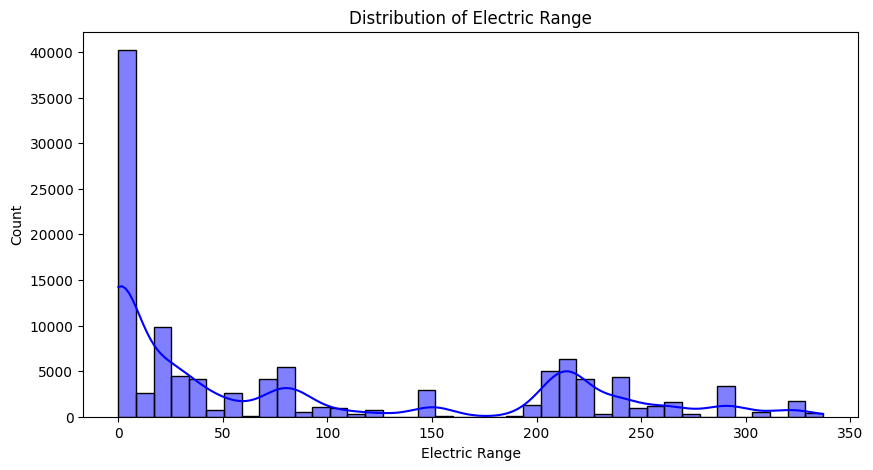

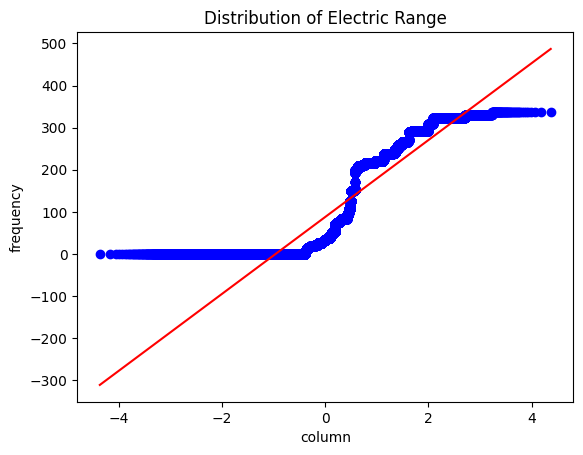

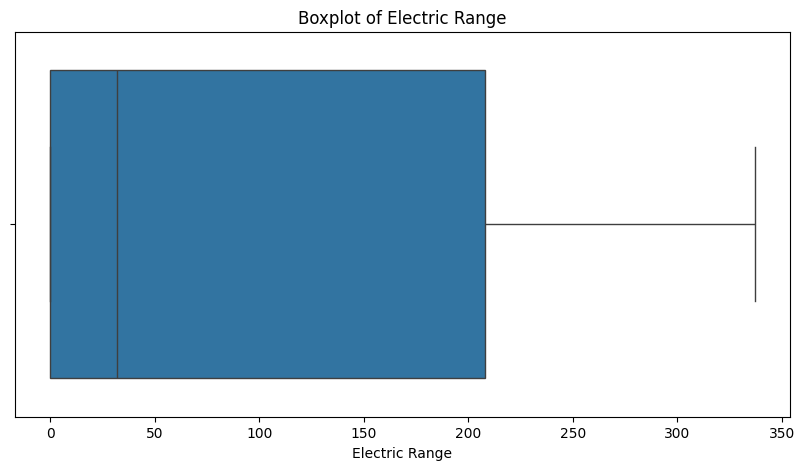

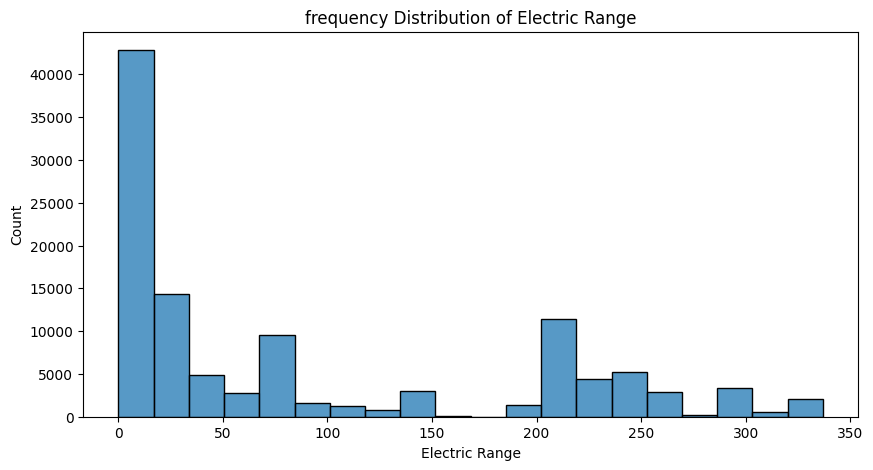

outliers in Electric Range"
"Empty DataFrame
Columns: [VIN (1-10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract]
Index: []


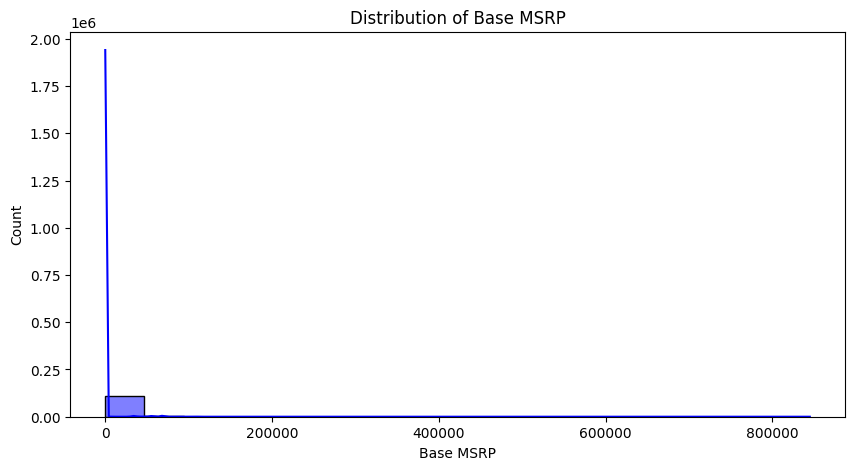

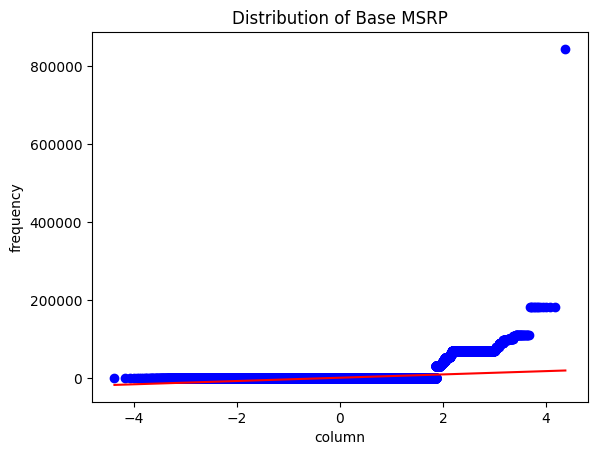

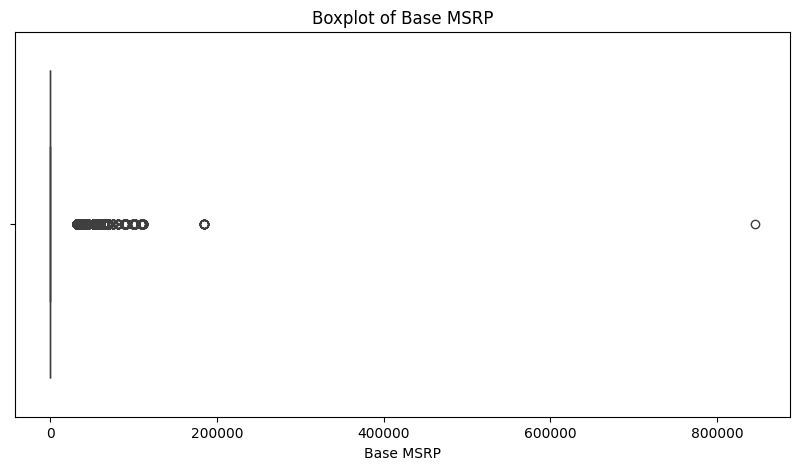

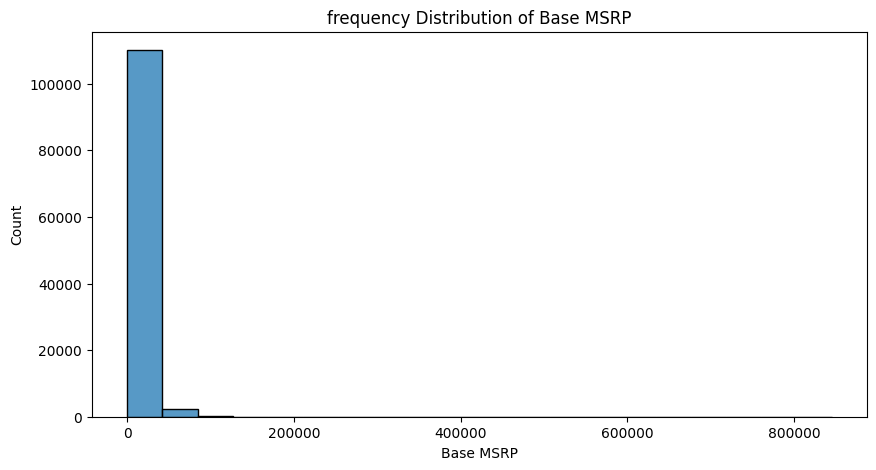

outliers in Base MSRP"
"        VIN (1-10)     County       City State  Postal Code  Model Year  \
9       KNDJP3AE2G     Skagit  Anacortes    WA        98221        2016   
24      WBAJB1C51K  Snohomish   Lynnwood    WA        98087        2019   
33      KNDJX3AE6J   Thurston      Lacey    WA        98503        2018   
190     5YJSA1H16E       King     Renton    WA        98056        2014   
191     5YJSA1H12E       King  Sammamish    WA        98075        2014   
...            ...        ...        ...   ...          ...         ...   
112369  5YJSA1DN5C  Snohomish   Lynnwood    WA        98037        2012   
112413  5YJSA1H17E       King   Bellevue    WA        98007        2014   
112452  KNDJP3AE9G       King    Seattle    WA        98115        2016   
112561  LYVBR0DL0K       King    Seattle    WA        98116        2019   
112570  KNDJX3AE8H  Snohomish    Edmonds    WA        98026        2017   

         Make    Model                   Electric Vehicle Type  \
9        

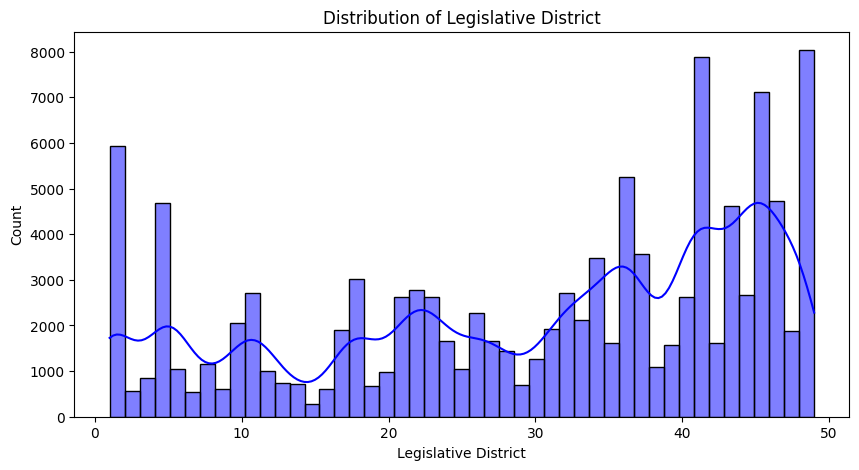

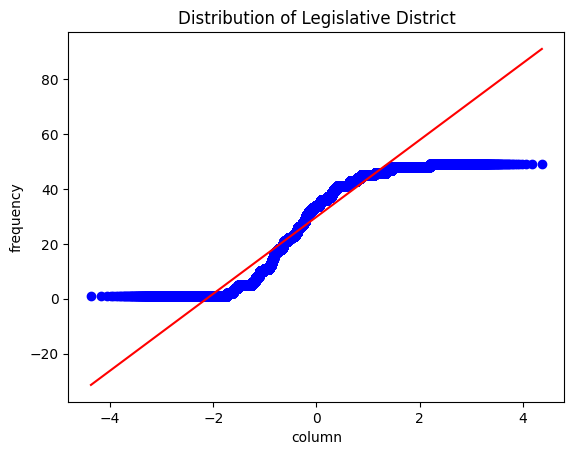

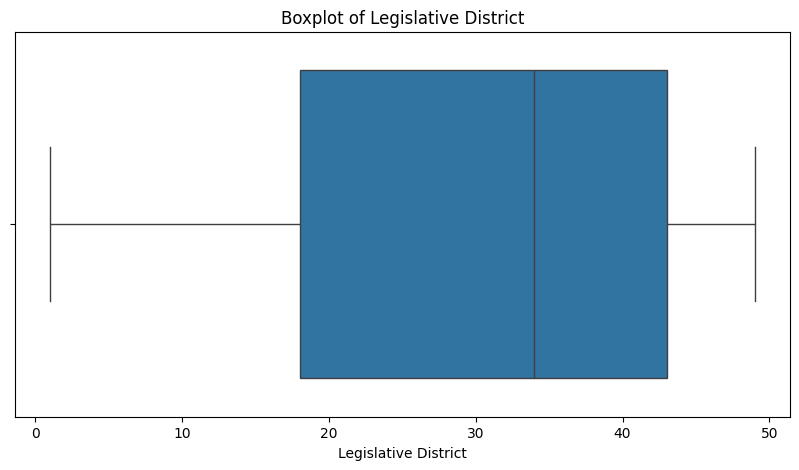

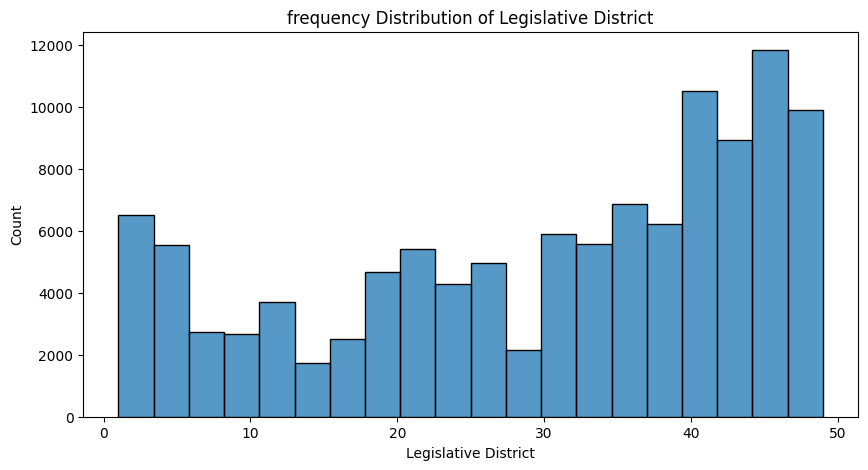

outliers in Legislative District"
"Empty DataFrame
Columns: [VIN (1-10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract]
Index: []


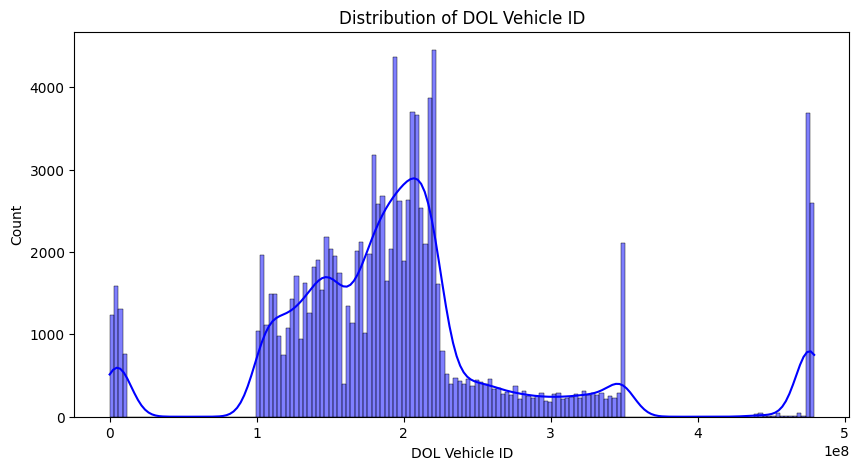

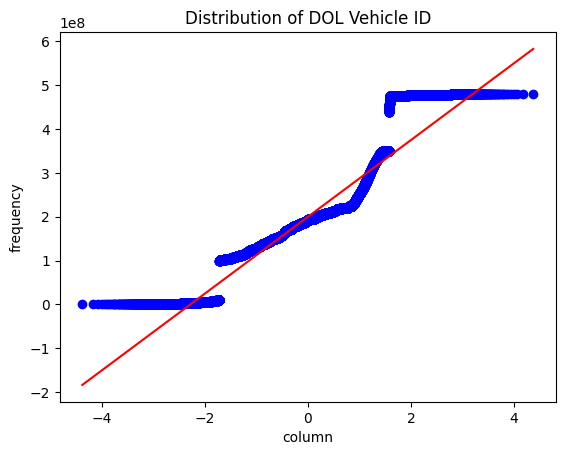

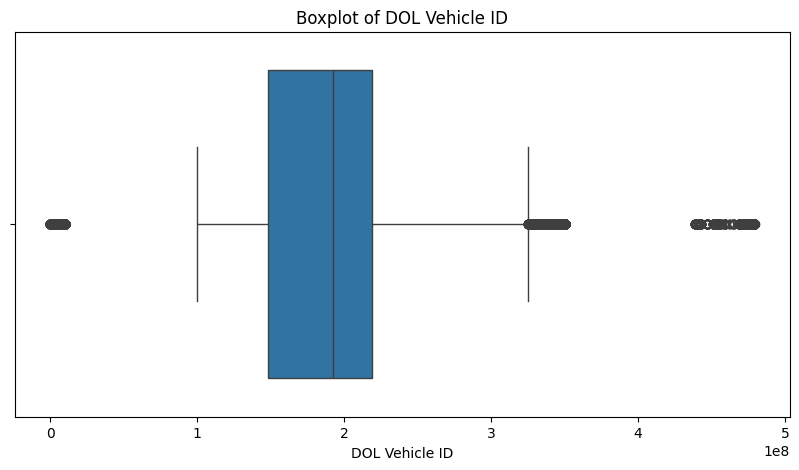

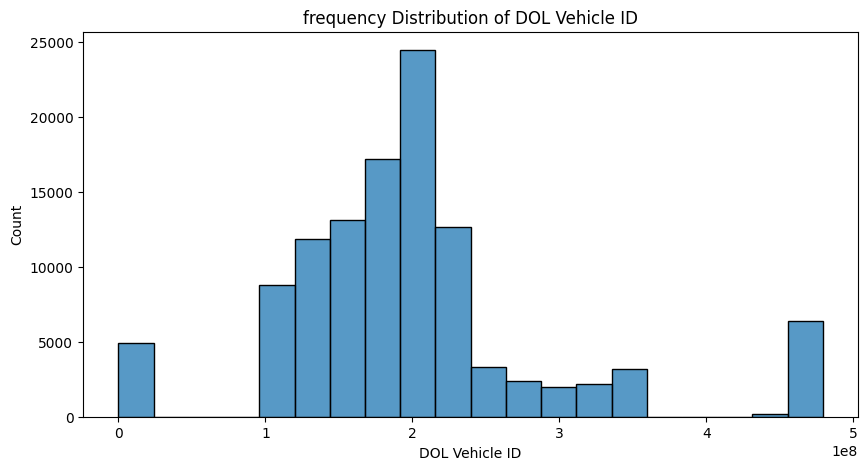

outliers in DOL Vehicle ID"
"        VIN (1-10)     County         City State  Postal Code  Model Year  \
1       1G1RD6E45D      Clark     Laughlin    NV        89029        2013   
4       3FA6P0SU1K  Snohomish      Everett    WA        98201        2019   
5       5YJ3E1EB5J  Snohomish      Bothell    WA        98021        2018   
8       1N4BZ0CP4G     Island      Clinton    WA        98236        2016   
11      5YJXCBE23L      Grant   Moses Lake    WA        98837        2020   
...            ...        ...          ...   ...          ...         ...   
112575  1G1RB6S53H  Snohomish      Edmonds    WA        98020        2017   
112579  5YJ3E1EA5J       King  Woodinville    WA        98072        2018   
112591  5YJXCDE27J       King     Bellevue    WA        98005        2018   
112608  5YJ3E1EB7J     Kitsap   Gig Harbor    WA        98329        2018   
112628  WA1E2AFY7L       King      Seattle    WA        98177        2020   

             Make    Model                   E

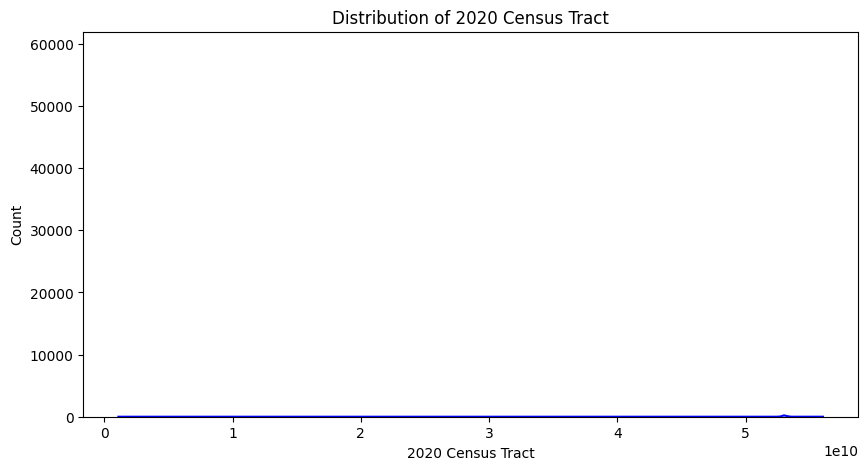

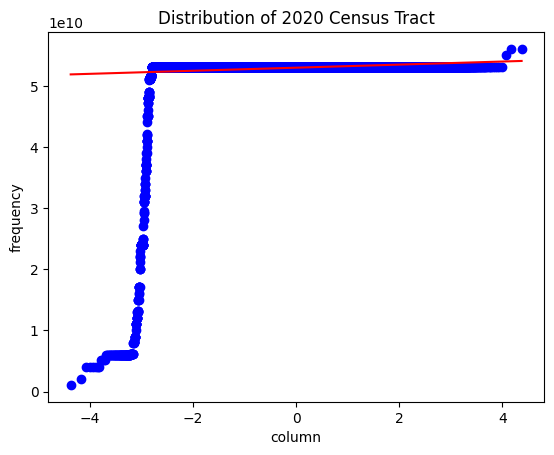

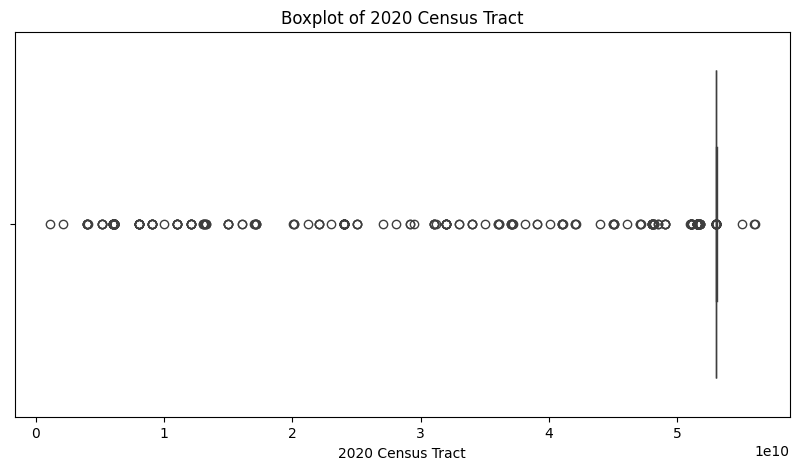

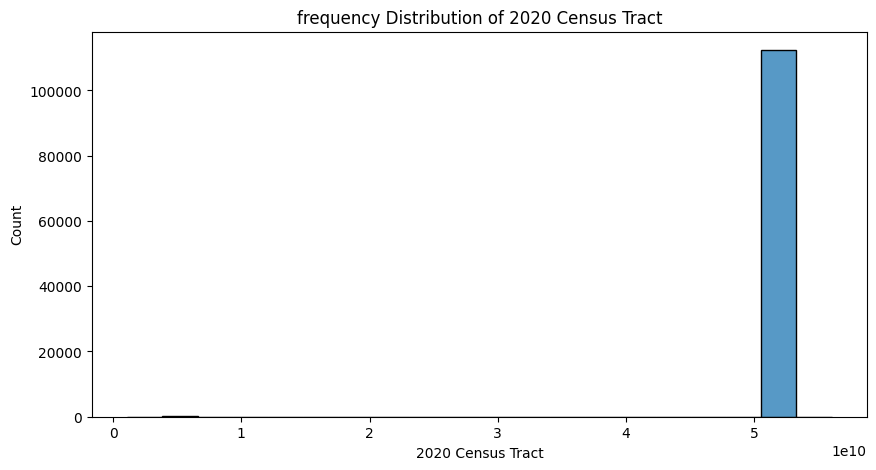

outliers in 2020 Census Tract"
"        VIN (1-10)        County               City State  Postal Code  \
0       JTMEB3FV6N        Monroe           Key West    FL        33040   
1       1G1RD6E45D         Clark           Laughlin    NV        89029   
12      3C3CFFGE3G     St. Clair          Mascoutah    IL        62258   
19      5YJXCAE28G      Saratoga  Greenfield Center    NY        12833   
41      5YJSA1E22G  Newport News       Newport News    VA        23602   
...            ...           ...                ...   ...          ...   
112153  1G1RB6E46F       Carroll       North Conway    NH         3860   
112301  5YJ3E1EB9M    Dorchester        Summerville    SC        29483   
112394  5UXKT0C36H   Leavenworth            Lansing    KS        66043   
112541  JA4J24A50J      Williams          Williston    ND        58802   
112603  7FCTGAAL7N      Kootenai             Worley    ID        83876   

        Model Year        Make       Model  \
0             2022      TOYOTA  R

In [44]:
for col in numerical_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True,color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()


    stats.probplot(df[col],dist='norm',plot=plt)
    plt.title(f'Distribution of {col}')
    plt.xlabel("column")
    plt.ylabel("frequency")
    plt.show()


    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


    plt.figure(figsize=(10,5))
    sns.histplot(df[col],bins=20,kde=False)
    plt.title(f'frequency Distribution of {col}')
    plt.show()


    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'outliers in {col}"\n"{outliers}')


In [45]:
discrete_columns=df.select_dtypes(include=['object'])
discrete_columns

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,JTMEB3FV6N,Monroe,Key West,FL,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-81.80023 24.5545),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1,1G1RD6E45D,Clark,Laughlin,NV,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-114.57245 35.16815),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,JN1AZ0CP8B,Yakima,Yakima,WA,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-120.50721 46.60448),PACIFICORP
3,1G1FW6S08H,Skagit,Concrete,WA,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC
4,3FA6P0SU1K,Snohomish,Everett,WA,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...
112629,7SAYGDEF2N,King,Duvall,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...
112631,1FMCU0KZ4N,King,Vashon,WA,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
112632,KNDCD3LD4J,King,Covington,WA,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [46]:
def discrete_univariate_analysis(discrete_columns):
    for col_name in discrete_columns:
        print("*"*5,col_name,"*"*5)
        print(discrete_columns[col_name].agg(["count","nunique","unique"]))
        print("value counts: \n",discrete_columns[col_name].value_counts())
        print()
discrete_univariate_analysis(discrete_columns)

***** VIN (1-10) *****
count                                                 112634
nunique                                                 7548
unique     [JTMEB3FV6N, 1G1RD6E45D, JN1AZ0CP8B, 1G1FW6S08...
Name: VIN (1-10), dtype: object
value counts: 
 VIN (1-10)
5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
             ... 
WA1LAAGE9M      1
5UXKT0C50H      1
5YJYGAED3M      1
WDC0G5DBXL      1
YV4ED3GM0P      1
Name: count, Length: 7548, dtype: int64

***** County *****
count                                                 112634
nunique                                                  165
unique     [Monroe, Clark, Yakima, Skagit, Snohomish, Isl...
Name: County, dtype: object
value counts: 
 County
King          59000
Snohomish     12434
Pierce         8535
Clark          6689
Thurston       4126
              ...  
Pinal             1
Elmore            1
Portsmouth        1
Kings             1
Kootenai          1
Name: count, Length: 16

In [47]:
numerical_columns.columns

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')

<Axes: xlabel='Model Year', ylabel='Base MSRP'>

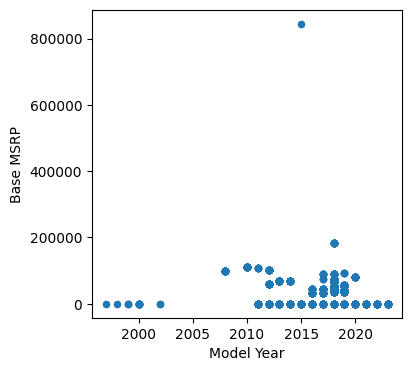

In [54]:
df.plot(kind='scatter', y='Base MSRP', x='Model Year', figsize=(4,4))

<Axes: xlabel='2020 Census Tract', ylabel='Legislative District'>

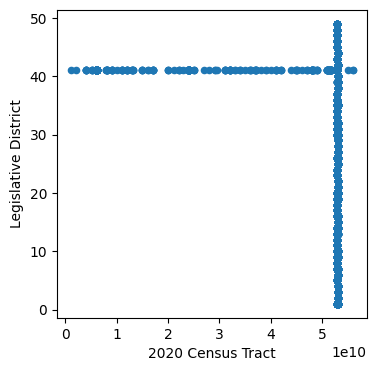

In [62]:
df.plot(kind='scatter', y='Legislative District', x='2020 Census Tract', figsize=(4,4))

<Axes: xlabel='Model Year', ylabel='Electric Range'>

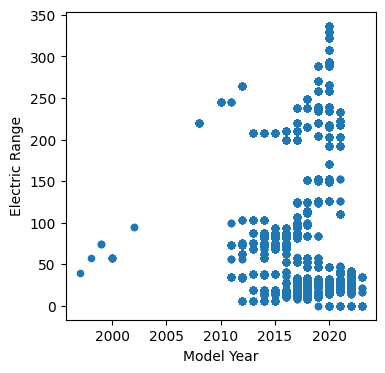

In [52]:
df.plot(kind='scatter', x='Model Year', y='Electric Range', figsize=(4,4))

In [63]:
discrete_columns.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')

In [66]:
pd.crosstab(df['Electric Vehicle Type'], df['Make'])

Make,AUDI,AZURE DYNAMICS,BENTLEY,BMW,CADILLAC,CHEVROLET,CHRYSLER,FIAT,FISKER,FORD,...,POLESTAR,PORSCHE,RIVIAN,SMART,SUBARU,TESLA,TH!NK,TOYOTA,VOLKSWAGEN,VOLVO
Electric Vehicle Type,,,,,,,,,,,,,,,,,,,,,
Battery Electric Vehicle (BEV),1126,7,0,905,0,5286,0,822,0,2179,...,558,418,885,273,1,52078,3,59,2514,647
Plug-in Hybrid Electric Vehicle (PHEV),1206,0,3,3775,108,4896,1794,0,20,3640,...,0,400,0,0,58,0,0,4346,0,1641


In [91]:
px.pie(df,names='Model Year',values='Base MSRP')

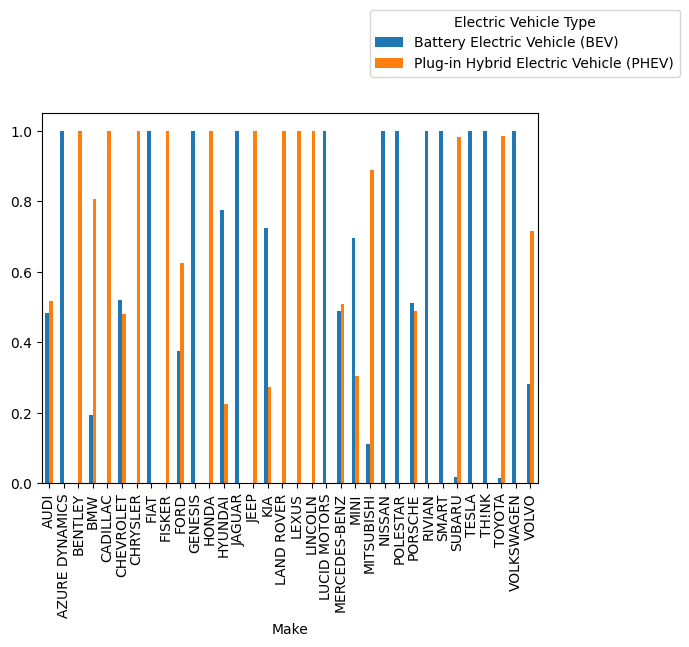

In [76]:
df1=pd.crosstab(df['Make'], df['Electric Vehicle Type'],normalize='index')
ax=df1.plot(kind='bar')
ax.legend(title="Electric Vehicle Type", loc='upper right', bbox_to_anchor=(1.3,1.3))
plt.show()


In [77]:
pd.crosstab(df['County'], df['Electric Vehicle Type'])

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
County,,
Adams,24,11
Alameda,2,0
Alexandria,6,2
Allegheny,1,0
Anne Arundel,6,3
...,...,...
Whatcom,2058,782
Whitman,115,62
Wichita,2,0


<Axes: title={'center': 'Model Year'}, xlabel='Electric Vehicle Type'>

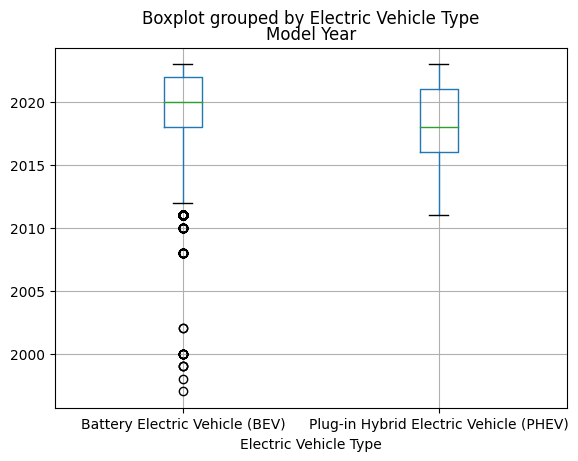

In [79]:
df.boxplot(by='Electric Vehicle Type',column='Model Year')

In [81]:
! pip install plotly

In [83]:
import plotly.express as px

In [150]:
temp_df=df.groupby(['County','State','Postal Code','Model Year','Make']).size().reset_index(name='EV Count')
temp_df

,County,State,Postal Code,Model Year,Make,EV Count
0,Adams,CO,80019,2022,TESLA,1
1,Adams,WA,99169,2014,FORD,1
2,Adams,WA,99169,2015,TESLA,1
3,Adams,WA,99169,2017,BMW,1
4,Adams,WA,99169,2017,CHEVROLET,1
...,...,...,...,...,...,...
24439,Yakima,WA,98953,2021,JEEP,1
24440,Yakima,WA,98953,2022,KIA,1
24441,Yakima,WA,98953,2022,VOLVO,2
24442,Yakima,WA,99350,2013,CHEVROLET,1


In [167]:
fig = px.choropleth(temp_df,
                    locations='State',
                    locationmode='USA-states',
                    color='EV Count',
                    scope='usa',
                    animation_frame='Postal Code',
                    color_continuous_scale='Plasma',
                    labels={'County': 'Number of EV Vehicles'},
                    title='Number of Electric Vehicles based on location')

fig.show()

In [168]:
! pip install bar-chart-race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.9 MB/s eta 0:00:00


**Racing Bar Plot**

In [169]:
import bar_chart_race as bcr

In [185]:
final=df.groupby(['Model Year','Make']).size().unstack(fill_value=0)
bcr.bar_chart_race(
    df=final,
    filename="final.mp4",
    orientation='h',
    sort='desc',
    n_bars=10,
    steps_per_period=45,
    period_length=3000,
    title="Year-wise sales of EV and their Count",
)
from IPython.display import Video
bcr.bar_chart_race(
    df=final,
    filename="final.mp4",
    figsize=(10,5),
    dpi=120,
    orientation='h',
    sort='desc',
    n_bars=10,
    steps_per_period=45,
    period_length=3000,
    bar_kwargs={'alpha': .99, 'lw': 0},
    title="Year-wise sales of EV and their Count",
    title_size=25,
    period_label={'x': .95, 'y': .15, 'ha': 'right', 'va': 'center'},
    period_fmt='{x:.0f}',
)
Video("final.mp4", embed=True)

Output hidden; open in https://colab.research.google.com to view.